# 学习颜色识别


## 目标

* 了解颜色空间
* 熟悉与运算的使用和原理


学习视觉的颜色空间，以及互相转换的方法，了解颜色识别的原理和实现步骤。


## 01. 颜色识别知识点


### 1.1 颜色空间

OpenCV中有很多种不同的颜色空间，并且他们之间可以互相转换，当前在机器视觉中常用的是GRAY颜色空间（灰度图像）、XYZ颜色空间、YCrCb颜色空间、HSV颜色空间、HLS颜色空间、CIEL*a*b*颜色空间、CIEL*u*v*颜色空间等。

BGR就是我们熟知的RGB，在OpenCV中的顺序是反的，也就是蓝色，绿色和红色，每个像素点都由一个三元数组表表示即蓝绿红。

颜色空间类型转换是指，将图像从一个颜色空间转换到另外一个颜色空间。例如，在使用OpenCV处理图像时，可能会在RGB颜色空间和HSV颜色空间之间进行转换。在进行图像的特征提取、距离计算时，往往先将图像从RGB颜色空间处理为灰度色彩空间。在一些应用中，可能需要将色彩空间的图像转换为二值图像等等。

颜色空间在图像处理和计算机视觉中的作用是非常重要的，同时也会复杂一些。刚开始的时候可以先使用RGB颜色空间，但这是暂时的，后续在很多图像处理中RGB颜色空间不能满足也不方便使用，所以需要对每个常用的颜色空间有所了解，在后续需要使用其他颜色空间也不至于茫然，所以通过后面案例的展示我们可以对常用的几个颜色空间有个初步的认识，对后面的学习会有很大的帮助。

#### 灰度空间
灰度空间是除去了彩色信息而中留下了灰阶，通常指的是8位灰度图，其具有256个灰度级，像素值的范围是\[0,255\]。

#### XYZ空间
XYZ色彩空间是由CIE（International Commission on Illumination）定义的，是一种更便于计算的色彩空间，它可以与RGB色彩空间相互转换。

#### YCrCb空间
人眼视觉系统（HVS,Human Visual System）对颜色的敏感度要低于对亮度的敏感度。在传统的RGB颜色空间内，RGB三原色具有相同的重要性，但是忽略了亮度信息。在YCrCb颜色空间中，Y代表光源的亮度，色度信息保存在Cr和Cb中，其中，Cr表示红色分量信息，Cb表示蓝色分量信息。亮度给出了颜色亮或暗的程度信息。

#### HSV空间
RGB是从硬件的角度提出的颜色模型，在与人眼匹配的过程中可能存在一定的差异，HSV颜色空间是一种面向视觉感知的颜色模型。HSV颜色空间从心理学和视觉的角度出发，指出人眼的色彩知觉主要包含三要素：色调（Hue，也称为色相）、饱和度（Saturation）、亮度（Value），色调指光的颜色，饱和度是指色彩的深浅程度，亮度指人眼感受到的光的明暗程度。

在OpenCV里直接使用HSV，它的空间取值范围以及对应的颜色，如下表格所示。

<div style="float:left;border:solid 1px 000;margin:2px;"><img src="../pic/chapter4_1.png"  width="600" height="400" ></div>
<div style="float:none;clear:both;"></div> 

#### YUV空间

YUV（亦称YCrCb）是被欧洲电视系统所采用的一种颜色编码方法（属于PAL），是PAL和SECAM模拟彩色电视制式采用的颜色空间。其中的Y,U,V几个字母不是英文单词的组合词，Y表示明亮度（Luminance或Luma），也就是灰阶值；而“U”和“V” 表示的则是色度（Chrominance或Chroma），作用是描述影像色彩及饱和度，用于指定像素的颜色。“U”和“V”是构成彩色的两个分量。

采用YUV色彩空间的重要性是它的亮度信号Y和色度信号U、V是分离的。如果只有 Y信号分量而没有U、V信号分量，那么这样表示的图像就是黑白灰度图像。彩色电视采用YUV空间正是为了用亮度信号Y解决彩色电视机与黑白电视机的相容问题，使黑白电视机也能接收彩色电视信号。



### 1.2 ROI

在图像处理过程中，我们可能会对图像的某一个特定区域感兴趣，该区域被称为感兴趣区域（Region of Interest,ROI）。在设定感兴趣区域ROI后，就可以对该区域进行整体操作。例如，将一个感兴趣区域A赋值给变量B后，可以将该变量B赋值给另外一个区域C，从而达到在区域C内复制区域A的目的。

后面我们通过例子来理解ROI的概念。


### 1.3 通道的合并与拆分

在RGB图像中，图像是由R通道、G通道、B通道三个通道构成的。需要注意的是，在OpenCV中，通道是按照B通道→G通道→R通道的顺序存储的。
在图像处理过程中，可以根据需要对通道进行拆分和合并。通过拆分可以分别获取到每个通道的图像数据，再单独处理完每个通道后进行合并通道。
通道的拆分可以使用OpenCV的方法split，也可以使用numpy的数组的方式操作，合并只能用OpenCV的merge方法。


### 1.4 获取图像的属性
在图像处理过程中，经常需要获取图像的属性，例如图像的大小、类型等。如下为几个常用的属性：

* shape：如果是彩色图像，则返回包含行数、列数、通道数的数组；如果是二值图像或者灰度图像，则仅返回行数和列数。通过该属性的返回值是否包含通道数，可以判断一幅图像是灰度图像（或二值图像）还是彩色图像。
* size：返回图像的像素数目。其值为“行×列×通道数”，灰度图像或者二值图像的通道数为1。
* dtype：返回图像的数据类型

## 02 颜色空间转化

OpenCV提供了方法**cv2.cvtColor**来完成颜色空间的转换，该方法的语法格式为：dst=cv2.cvtColor(src,code[,dstCn])
式中：
 - dst 是输出图像。
 - src表示原始输入图像。
 - code表示颜色空间转换码，常用的有CV_BGR2GRAY(BGR转灰度图)，CV_BGR2HSV(BGR转HSV)等。
 - dstCn表示输出图像通道数，默认为0，则通道数自动通过原始输入图像和code得到。

如下例子展示与灰度图，HSV以及LAB颜色空间的转换。

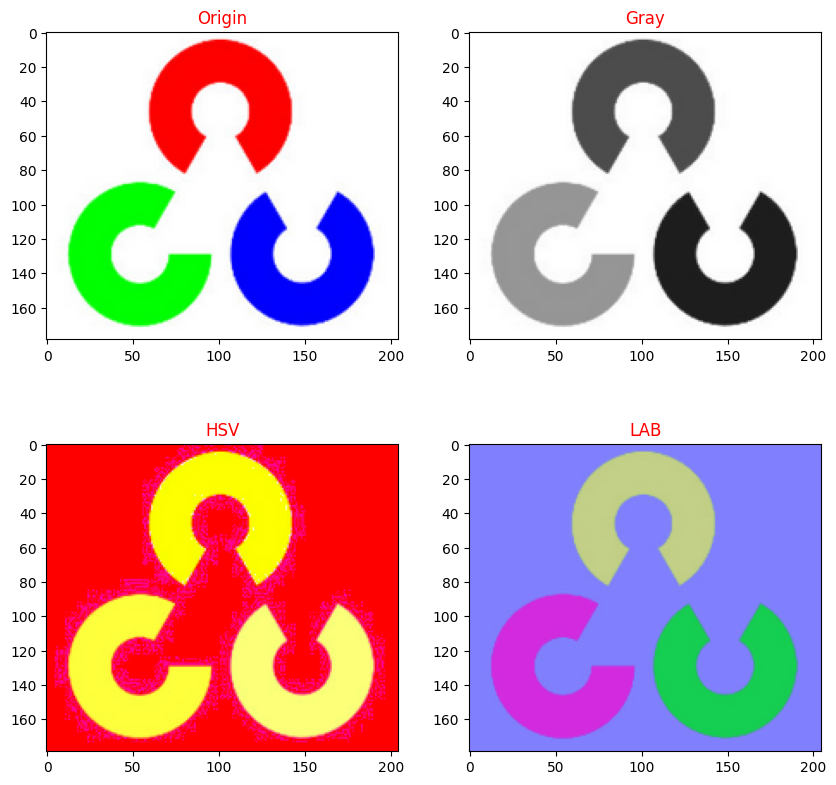

In [52]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread("../pic/pic5.png")
equal = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(10,10), dpi=100)
ax1 = plt.subplot(221)
ax1.set_title('Origin',fontsize=12,color='r')
ax1.imshow(equal)

#opencv 返回的对象都是bgr的，而matlib需要rgb的所以需要再做一次转换才能显示正常
#直接使用opencv的imshow方法不用转换两次
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
equal = cv2.cvtColor(gray,cv2.COLOR_BGR2RGB)
ax2 = plt.subplot(222)
ax2.set_title('Gray',fontsize=12,color='r')
ax2.imshow(equal)

hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
equal = cv2.cvtColor(hsv,cv2.COLOR_BGR2RGB)
ax3 = plt.subplot(223)
ax3.set_title('HSV',fontsize=12,color='r')
ax3.imshow(equal)

lab = cv2.cvtColor(image,cv2.COLOR_BGR2LAB)
equal = cv2.cvtColor(lab,cv2.COLOR_BGR2RGB)
ax4 = plt.subplot(224)
ax4.set_title('LAB',fontsize=12,color='r')
plt.imshow(equal)

## 03 ROI

如下例子展示如何对ROI区域进行操作

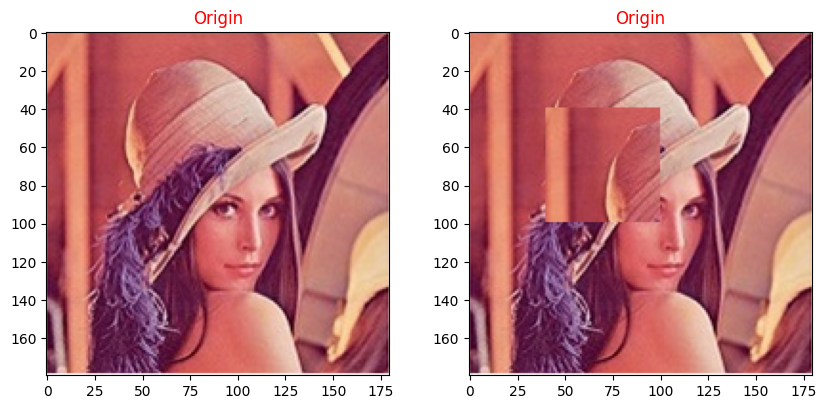

In [53]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread("../pic/pic4.png")
equal = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(10,10), dpi=100)
ax1 = plt.subplot(221)
ax1.set_title('Origin',fontsize=12,color='r')
ax1.imshow(equal)

face=image[10:70,10:70]#获取图像行10到70，列10到70的像素区域作为ROI

image[40:100,40:100] = face#把ROI复制给原图的40行到100行，40列到100列的区域里。
equal = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
ax2 = plt.subplot(222)
ax2.set_title('Origin',fontsize=12,color='r')
ax2.imshow(equal)

## 04 通道的拆分

OpenCV提供了方法**cv2.split**能够拆分图像的通道，该方法的语法格式为：**(b,g,r)=cv2.split(image)**

式中：

 - (b,g,r) 是输出的通道数据。b为蓝色通道，g为绿色通道，r为红色通道。
 - image表示原始输入图像。


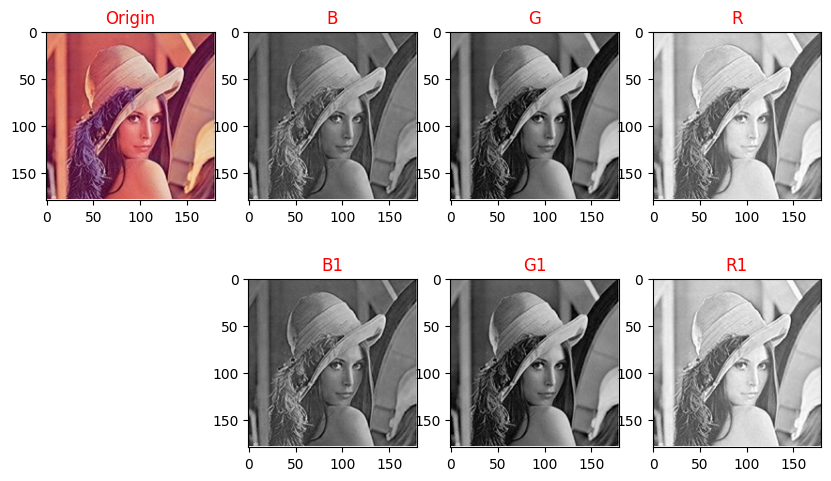

In [54]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread("../pic/pic4.png")
equal = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(10,6), dpi=100)
ax1 = plt.subplot(241)
ax1.set_title('Origin',fontsize=12,color='r')
ax1.imshow(equal)

b=image[: ,: ,0]
g=image[: ,: ,1]
r=image[: ,: ,2]

equal = cv2.cvtColor(b,cv2.COLOR_BGR2RGB)
ax2 = plt.subplot(242)
ax2.set_title('B',fontsize=12,color='r')
ax2.imshow(equal)

equal = cv2.cvtColor(g,cv2.COLOR_BGR2RGB)
ax2 = plt.subplot(243)
ax2.set_title('G',fontsize=12,color='r')
ax2.imshow(equal)

equal = cv2.cvtColor(r,cv2.COLOR_BGR2RGB)
ax2 = plt.subplot(244)
ax2.set_title('R',fontsize=12,color='r')
ax2.imshow(equal)

(b,g,r)= cv2.split(image)

equal = cv2.cvtColor(b,cv2.COLOR_BGR2RGB)
ax2 = plt.subplot(246)
ax2.set_title('B1',fontsize=12,color='r')
ax2.imshow(equal)

equal = cv2.cvtColor(g,cv2.COLOR_BGR2RGB)
ax2 = plt.subplot(247)
ax2.set_title('G1',fontsize=12,color='r')
ax2.imshow(equal)

equal = cv2.cvtColor(r,cv2.COLOR_BGR2RGB)
ax2 = plt.subplot(248)
ax2.set_title('R1',fontsize=12,color='r')
ax2.imshow(equal)


## 05 通道的合并

OpenCV提供了方法cv2.merge能够合并图像的通道，该方法的语法格式为：image=cv2.merge(\[b,g,r\])
式中：
 - image表示输出图像。
 - \[b,g,r\] 是输入的通道数据。b为蓝色通道，g为绿色通道，r为红色通道。
 


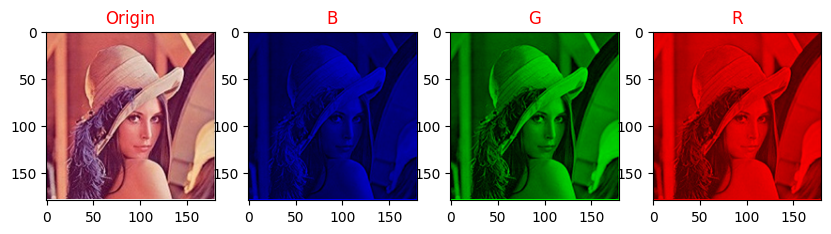

In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread("../pic/pic4.png")
equal = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(10,6), dpi=100)
ax1 = plt.subplot(141)
ax1.set_title('Origin',fontsize=12,color='r')
ax1.imshow(equal)

z = np.ones(image.shape[:2], 'uint8')#初始化一个矩阵大小与原图相同，用于合并通道使用
b, g, r = cv2.split(image)

b = cv2.merge([b, z, z])#b通道有数据所以合并后的图像为蓝色
g = cv2.merge([z, g, z])#同上
r = cv2.merge([z, z, r])#同上

equal = cv2.cvtColor(b,cv2.COLOR_BGR2RGB)
ax2 = plt.subplot(142)
ax2.set_title('B',fontsize=12,color='r')
ax2.imshow(equal)

equal = cv2.cvtColor(g,cv2.COLOR_BGR2RGB)
ax2 = plt.subplot(143)
ax2.set_title('G',fontsize=12,color='r')
ax2.imshow(equal)

equal = cv2.cvtColor(r,cv2.COLOR_BGR2RGB)
ax2 = plt.subplot(144)
ax2.set_title('R',fontsize=12,color='r')
ax2.imshow(equal)

## 06 获取图像属性

在做图像处理过程中经常需要知道图像的像素数目，行数，列数，通道数，形状信息。如下例子将会展示获取的方法。

**shape** 可以获取图像的形状，返回包含的行数，列数，通道数的元组。

* 灰度：返回行数，列数
* 彩色：返回行数，列数，通道数

**size** 可以获取图像的像素数目

* 灰度：返回：行数 x 列数
* 彩色：返回：行数 x 列数 x 通道数

**dtype** 返回的是图像的数据类型

In [56]:
import cv2

frame = cv2.imread("../pic/pic4.png")
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

print("frame size:",frame.size)#获得图像的像素数目。
print("frame shape:",frame.shape)#获取图像的形状，返回值是一个包含行数、列数、通道数的元组。
print("frame dtype:",frame.dtype) #获得图像的数据类型。

print("gray size:",gray.size)
print("gray shape:",gray.shape)
print("gray dtype:",gray.dtype)

frame size: 97200
frame shape: (180, 180, 3)
frame dtype: uint8
gray size: 32400
gray shape: (180, 180)
gray dtype: uint8


## 07 颜色识别

### 7.1 红色识别

OpenCV提供了方法**cv2.inRange**来完成设置阈值去除背景，该方法的语法格式为：**dst=cv2.inRange(img,low,high)**

式中：

* dst 是输出图像。
* img表示输入图像。
* low表示颜色下限值，图像中低于这个lower的像素值会变为0。
* high表示颜色的上限，图像中高于这个high的像素值会变为0。

像素值在区间范围内其值为255。

颜色识别里我们需要把读取出来BRG颜色空间转换成HSV颜色空间，因为HSV颜色空间更容易提取颜色，颜色只和H通道有关通过对H通道值进行筛选，便能够筛选出特定的颜色，所以首先我们需要根据颜色范围列表查找到红色的三个通道HSV的取值范围为（0,10），（43,255）（46,255），定义出lower_red最小值，upper_red最大值两个变量。



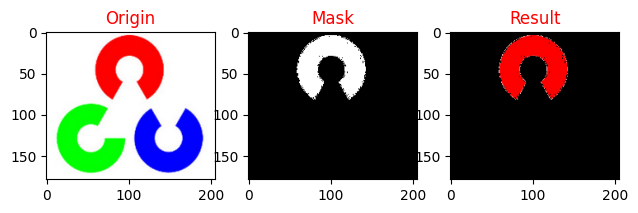

In [57]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread("../pic/pic5.png")
equal = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(10,6), dpi=100)
ax1 = plt.subplot(141)
ax1.set_title('Origin',fontsize=12,color='r')
ax1.imshow(equal)

lower_red = np.array([0, 43, 46])
upper_red = np.array([10, 255, 255])


# 转换成hsv颜色空间
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# get mask 利用inRange()函数和HSV模型中红色范围的上下界获取mask，mask中原视频中的红色部分会被弄成白色，其他部分黑色。
mask = cv2.inRange(hsv, lower_red, upper_red)
equal = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
ax2 = plt.subplot(142)
ax2.set_title('Mask',fontsize=12,color='r')
ax2.imshow(equal)

# detect blue 将mask于原视频帧进行按位与操作，则会把mask中的白色用真实的图像替换：
res = cv2.bitwise_and(image, image, mask=mask)
equal = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
ax3 = plt.subplot(143)
ax3.set_title('Result',fontsize=12,color='r')
ax3.imshow(equal)

### 7.2 肤色识别

同上一个例子，我们需要知道hsv三个分量的取值范围。

根据资料显示，正常黄种人的H分量大约在7至20之间，S分量大约在28至256之间，V分量大约在50至256之间。我们可以根据自己情况需求放大或缩小这两个分量的范围，会有不同的效果。



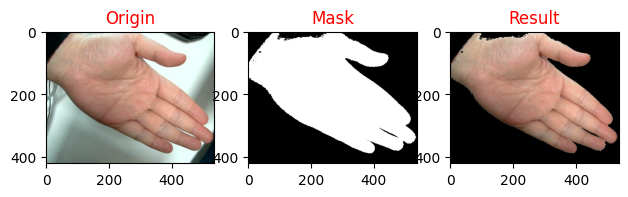

In [58]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread("../pic/pic6.png")
equal = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(10,6), dpi=100)
ax1 = plt.subplot(141)
ax1.set_title('Origin',fontsize=12,color='r')
ax1.imshow(equal)

'''
据资料显示，正常黄种人的H分量大约在7至20之间，
S分量大约在28至256之间，V分量大约在50至256之间。
大家可以根据自己项目需求放大或缩小这两个分量的范围，会有不同的效果。
'''
#lower = np.array([0, 28, 50]) #黑人
#upper = np.array([180,255, 255])
lower = np.array([0, 28, 50])
upper = np.array([20,255, 255])

# change to hsv model
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

mask = cv2.inRange(hsv,lower,upper)
equal = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
ax2 = plt.subplot(142)
ax2.set_title('Mask',fontsize=12,color='r')
ax2.imshow(equal)

# detect blue 将mask于原视频帧进行按位与操作，则会把mask中的白色用真实的图像替换：
res = cv2.bitwise_and(image, image, mask=mask)
equal = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
ax3 = plt.subplot(143)
ax3.set_title('Result',fontsize=12,color='r')
ax3.imshow(equal)
